In [5]:
# Load libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/sakiti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sakiti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sakiti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Load the data
df = pd.read_csv('Data.csv', index_col=0)
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [11]:
# Drop missing values
df.dropna(subset=['statement'], inplace=True)
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [12]:
# Preprocessing function
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

In [14]:
# Apply preprocessing
df['cleaned_statement'] = df['statement'].apply(preprocess_text)
df

,statement,status,cleaned_statement
0,oh my gosh,Anxiety,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless restless month boy mean
...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,nobody take seriously i’ve 24m dealt depressio...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,selfishness dont feel good like dont belong wo...
53040,Is there any way to sleep better? I can't slee...,Anxiety,way sleep better cant sleep night med didnt help
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,public speaking tip hi give presentation work ...


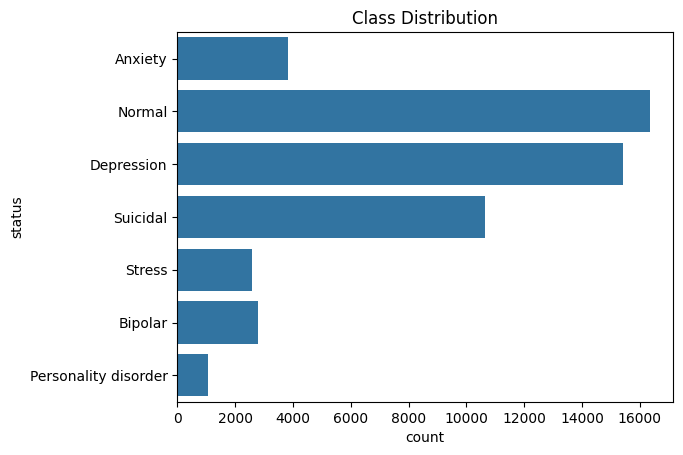

In [15]:
# Visualize class distribution
sns.countplot(y=df['status'])
plt.title('Class Distribution')
plt.show()

In [16]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['cleaned_statement'])
y = df['status']

In [ ]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [18]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.90      0.85      0.87      3375
             Bipolar       0.95      0.95      0.95      3214
          Depression       0.74      0.62      0.68      3274
              Normal       0.65      0.81      0.72      3325
Personality disorder       0.91      0.89      0.90      3241
              Stress       0.82      0.81      0.82      3209
            Suicidal       0.70      0.71      0.70      3243

            accuracy                           0.81     22881
           macro avg       0.81      0.81      0.81     22881
        weighted avg       0.81      0.81      0.81     22881



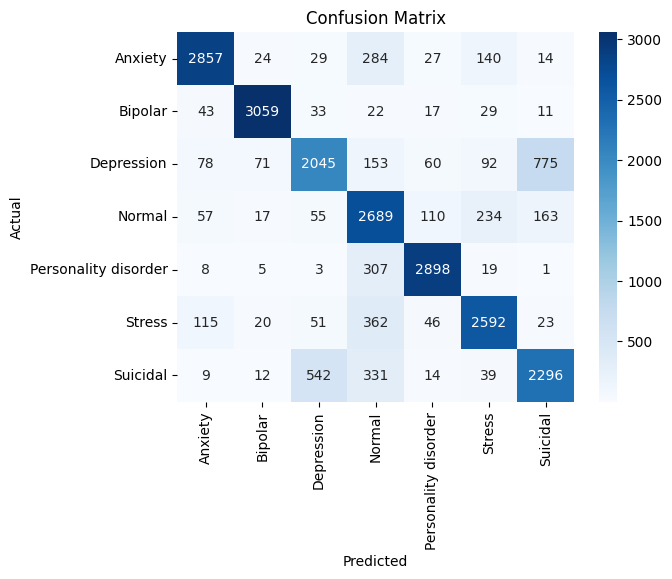

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
# Updated example statements for each state
example_statements = {
    "Anxiety": "My heart races, and I feel like something bad will happen soon.",
    "Bipolar": "i have two thoughts on one work",
    "Depression": "I feel empty and struggle to find joy in anything these days.",
    "Normal": "I’m feeling good.",
    "Personality disorder": "I often feel misunderstood and find it hard to maintain close relationships.",
    "Stress": "My workload is too heavy, and I can’t seem to keep up with everything.",
    "Suicidal": "Iam about to die."
}

# Loop through each sentence, predict the status, and print the results
for label, sentence in example_statements.items():
    predicted_status = predict_status(sentence, model, vectorizer)
    print(f"Original Statement: {sentence}")
    print(f"Actual Label: {label}")
    print(f"Predicted State: {predicted_status}\n")

Original Statement: My heart races, and I feel like something bad will happen soon.
Actual Label: Anxiety
Predicted State: Anxiety

Original Statement: i have two thoughts on one work
Actual Label: Bipolar
Predicted State: Normal

Original Statement: I feel empty and struggle to find joy in anything these days.
Actual Label: Depression
Predicted State: Depression

Original Statement: I’m feeling good.
Actual Label: Normal
Predicted State: Normal

Original Statement: I often feel misunderstood and find it hard to maintain close relationships.
Actual Label: Personality disorder
Predicted State: Personality disorder

Original Statement: My workload is too heavy, and I can’t seem to keep up with everything.
Actual Label: Stress
Predicted State: Stress

Original Statement: Iam about to die.
Actual Label: Suicidal
Predicted State: Suicidal

